In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib

from dsutil.plotting import add_grid,add_value_labels

pd.set_option('display.max_columns',1000)

import os

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
print('pandas: {}, numpy: {}, matplotlib: {}'.format(
    pd.__version__,
    np.__version__,
    matplotlib.__version__))

pandas: 0.25.1, numpy: 1.16.3, matplotlib: 3.0.3


In [3]:
df = pd.DataFrame({
    'user_id':[1,2,1,3,3,],
    'content_id':[1,1,2,2,2],
    'tag':['cool','nice','clever','clever','not-bad']
})
df

,user_id,content_id,tag
0,1,1,cool
1,2,1,nice
2,1,2,clever
3,3,2,clever
4,3,2,not-bad


In [4]:
df.groupby("content_id")['tag'].apply(lambda tags: ','.join(tags)).to_frame().reset_index()

,content_id,tag
0,1,"cool,nice"
1,2,"clever,clever,not-bad"


In [5]:
df.groupby("content_id")["user_id"].nunique().to_frame().reset_index().rename(columns={"user_id":'unique_users'})

,content_id,unique_users
0,1,2
1,2,2


### sort groupby groups

In [6]:
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})
df

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table
5,100.00,mobile phone
6,99.99,table


In [7]:
df.groupby('product')['value'].sum().to_frame().reset_index()

,product,value
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


In [8]:
df.groupby('product')['value'].sum().to_frame().reset_index().sort_values(by='value')

,product,value
0,chair,55.01
2,table,153.66
1,mobile phone,211.22


In [9]:
type(df.groupby('product')['value'])

pandas.core.groupby.generic.SeriesGroupBy

## plot group size

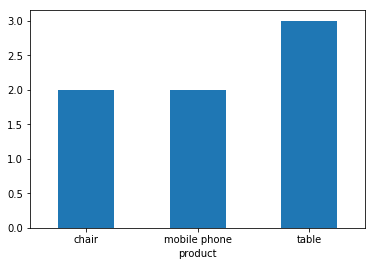

In [10]:
plt.clf()
df.groupby('product').size().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

## plot sum by group

<Figure size 432x288 with 0 Axes>

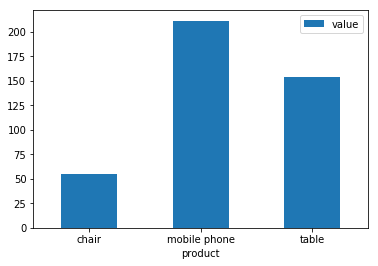

In [11]:
plt.clf()
df.groupby('product').sum().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

## plot group average with error bars

In [12]:
df = pd.DataFrame({
    'product':['table','table','table','mobile phone','mobile phone','mobile phone','chair','chair','chair'],
    'purchase_price':[28.45, 25.89,32.12,99.99,120.00,170.00,12.22,28.22,5.00]
})
df[['product','purchase_price']]

,product,purchase_price
0,table,28.45
1,table,25.89
2,table,32.12
3,mobile phone,99.99
4,mobile phone,120.00
5,mobile phone,170.00
6,chair,12.22
7,chair,28.22
8,chair,5.00


In [13]:
df.groupby('product').agg([np.mean,np.std])

purchase_price           
                       mean        std
product                               
chair             15.146667  11.883439
mobile phone     129.996667  36.059673
table             28.820000   3.131437

In [14]:
v=df.groupby('product').agg([np.mean,np.std])

v.columns = [col[-1].strip() for col in v.columns.values]


for index,row in v.iterrows():
    name = row.name
    mean = row['mean']
    stddev = row['std']    
    
v['mean'] = v['mean'].apply(lambda v: '{:.2f}'.format(v)) 
v['std'] = v['std'].apply(lambda v: '{:.2f}'.format(v)) 

v.reset_index()

,product,mean,std
0,chair,15.15,11.88
1,mobile phone,130.00,36.06
2,table,28.82,3.13


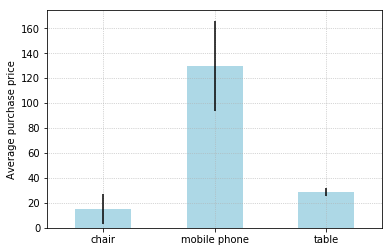

In [15]:
plt.clf()

ax = plt.gca()

# plot the means
df.groupby('product').mean().plot(kind='bar',color='lightblue',ax=ax)

# generate a dataframe with means and standard deviations
grouped_df=df.groupby('product').agg([np.mean,np.std])

# flatten column names
grouped_df.columns = [col.strip() for col in v.columns.values]

# iterrows is usually very slow but since this is a grouped
# dataframe, there wonly be many rows
for i,(index,row) in enumerate(grouped_df.iterrows()):
    name = row.name
    mean = row['mean']
    stddev = row['std']
    
    # plot the vertical line
    ax.vlines(x=i,ymin=mean-stddev,ymax=mean+stddev)   
        
plt.xticks(rotation=0)
add_grid()
plt.ylabel('Average purchase price')
plt.xlabel(None)
plt.gca().legend_.remove()
plt.show()

### flattening

In [16]:
df = pd.DataFrame({
    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})
df

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table
5,100.00,mobile phone
6,99.99,table


In [17]:
grouped_df = df.groupby('product').agg({'value':['min','max','mean']})

In [18]:
grouped_df

value                 
                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220

In [19]:
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df.reset_index()

,product,value_min,value_max,value_mean
0,chair,22.89,32.12,27.505
1,mobile phone,100.00,111.22,105.610
2,table,20.45,99.99,51.220


### iterate over groups

In [20]:
df

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table
5,100.00,mobile phone
6,99.99,table


In [21]:
for key,group_df in df.groupby('product'):
    print("the group for product '{}' has {} rows".format(key,len(group_df)))  

the group for product 'chair' has 2 rows
the group for product 'mobile phone' has 2 rows
the group for product 'table' has 3 rows


## group by and change aggregation column name

In [22]:
df

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table
5,100.00,mobile phone
6,99.99,table


In [23]:
df.groupby('product')['value'].sum().to_frame().reset_index()

,product,value
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


In [24]:
df.groupby('product')['value'].sum().reset_index(name='value_sum')

,product,value_sum
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


## get group by key

In [25]:
df

,value,product
0,20.45,table
1,22.89,chair
2,32.12,chair
3,111.22,mobile phone
4,33.22,table
5,100.00,mobile phone
6,99.99,table


In [26]:
# grouped_df is a DataFrameGroupBy containing each individual group as a dataframe
grouped_df = df.groupby('product')

# you get can a dataframe containing the values for a single group
# using .get_group('group_key')
grouped_df.get_group('chair')

,value,product
1,22.89,chair
2,32.12,chair


## group into list

In [27]:
df.groupby('product')['value'].apply(lambda group_series: sorted(group_series.tolist())).reset_index(name='values')

,product,values
0,chair,"[22.89, 32.12]"
1,mobile phone,"[100.0, 111.22]"
2,table,"[20.45, 33.22, 99.99]"


## custom aggregation function

In [28]:
df = pd.DataFrame({
    'value':[20,22,32,111,33,100,99],
    'product':['table','chair','chair','mobile phone','table','mobile phone','table']
})

df

,value,product
0,20,table
1,22,chair
2,32,chair
3,111,mobile phone
4,33,table
5,100,mobile phone
6,99,table


In [29]:
def count_even_numbers(series):
    return len([elem for elem in series if elem % 2 == 0 ])

df.groupby('product')['value'].apply(count_even_numbers).reset_index(name='num_even_numbers')

,product,num_even_numbers
0,chair,2
1,mobile phone,1
2,table,1


## stratified sampling

In [30]:
df = pd.DataFrame({
    'price':[20,22,32,111,33,100,99],
    'product':['table','chair','chair','table','table','chair','table']
})

df.sort_values(by='product')

,price,product
1,22,chair
2,32,chair
5,100,chair
0,20,table
3,111,table
4,33,table
6,99,table


In [31]:
df.groupby("product").apply(
    lambda group_df: group_df.sample(2)
).reset_index(drop=True)

,price,product
0,100,chair
1,32,chair
2,99,table
3,33,table
